# Estimating $\pi$ with a Montecarlo algorithm

This is the "hello world" exercise for Montecarlo Algorithms: estimating the value of $\pi$ using brute-force statistics.

The idea is the following: if you inscribe a circle of radius $r$ in a square of side $2r$, the ratio between the two areas is:

\begin{equation}
\frac{\pi r^2}{4 r^2} = \frac{\pi}{4}
\end{equation} 

<img src="https://drive.google.com/uc?id=1_tjzn6qSOcukiEwByhH2R3VRSAqQW2Iu" alt="Drawing" width="300"/>

Now throw samples inside the square with uniform probability.
The probability that your random point falls inside the circle is exactly the ratio between the two areas $p = \pi/4$ . 

You can estimate the probability $p$ by counting the number of succesful events (points inside the circle) divided by the total number of events. Therefore:

\begin{equation}
\pi = 4 p = 4 \lim_{n \rightarrow \infty} \frac{\text{# samples inside the circle}}{n}
\end{equation} 

Increasing the number of samples, the estimate of $\pi$ increases in accuracy.

<img src="https://drive.google.com/uc?id=1QB-kA_lsImeA6itMzQ7cZPw0bBXBbLO3" alt="Drawing"/>


## 1 - Estimate $\pi$ given $n$ samples

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def circle_coordinates(radius, resoultion=100):
  x, y = [], []
  for theta in np.linspace(0, 2*np.pi, resoultion):
    x.append(radius*np.cos(theta))
    y.append(radius*np.sin(theta))
  return x, y

In [ ]:
n_samples = 10000
x, y = np.array([]), np.array([])
true_counts = 0

for _ in range(n_samples):
  x = np.append(x, np.random.rand()*2-1)
  y = np.append(y, np.random.rand()*2-1)
  if x[-1]**2 + y[-1]**2 < 1:
    true_counts += 1

my_pi = true_counts/n_samples*4
error = abs(my_pi - np.pi)
print("Pi estimate with {} samples: {}, with an error of {}".format(n_samples, my_pi, error))

Pi estimate with 10000 samples: 3.1504, with an error of 0.008807346410206751


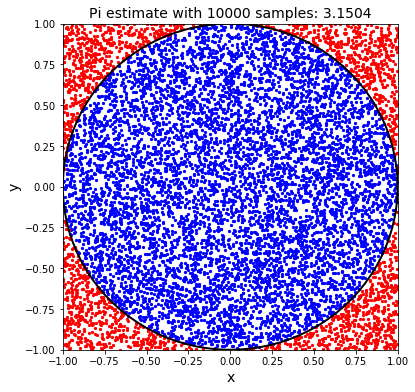

In [ ]:
x_circ, y_circ = circle_coordinates(1)
in_points = x**2 + y**2 < 1
out_points = np.logical_not(in_points)

plt.figure(figsize=(6,6))
plt.title("Pi estimate with {} samples: {}".format(n_samples, my_pi), fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.scatter(x[in_points], y[in_points], c='blue', s=5)
plt.scatter(x[out_points], y[out_points], c='red', s=5)

plt.plot(x_circ, y_circ, lw=2, c='black')

#plt.savefig('samples_{}.png'.format(n_samples), dpi=200)

## 1b, Extra - Solve the exercise without using python loops (if you did not before)

In [ ]:
large_n = 10**8

x, y = np.random.rand(large_n)*2-1, np.random.rand(large_n)*2-1
my_pi = (x**2 + y**2 < 1 ).sum() / large_n * 4
error = abs(np.pi - my_pi)

print("Pi estimate with {} samples: {}, with an error of {}".format(large_n, my_pi, error))

Pi estimate with 100000000 samples: 3.14152964, with an error of 6.301358979321492e-05


## 2 - Study the statistics of the process as the number of samples increases

In [5]:
n_samples = np.logspace(1, 4, 50, dtype=int)
n_realizations = 100
pi_averages, pi_std = [], []

for n in n_samples:
  pi_list = []
  for r in range(n_realizations):
    x, y = np.random.rand(n)*2-1, np.random.rand(n)*2-1
    pi_list.append((x**2 + y**2 < 1 ).sum() / n * 4)
  pi_averages.append(np.mean(pi_list))
  pi_std.append(np.std(pi_list))

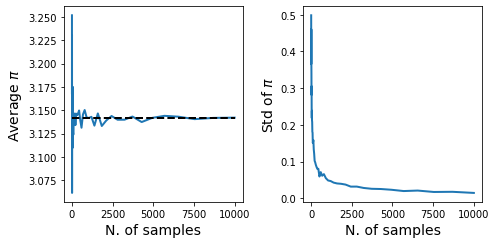

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(7,3.5))

ax1.set_xlabel('N. of samples', fontsize=14)
ax1.set_ylabel('Average $\pi$', fontsize=14)
ax1.plot(n_samples, pi_averages, lw=2)
ax1.plot(n_samples, np.ones(len(n_samples))*np.pi, c='black', ls='--', lw=2)

ax2.set_xlabel('N. of samples', fontsize=14)
ax2.set_ylabel('Std of $\pi$', fontsize=14)
ax2.plot(n_samples, pi_std, lw=2)

plt.tight_layout()

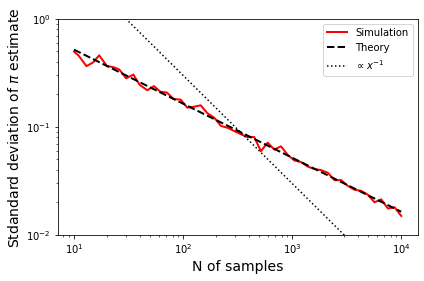

In [19]:
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N of samples', fontsize=14)
plt.ylabel('Stdandard deviation of $\pi$ estimate', fontsize=14)

plt.ylim([0.01,1])
plt.plot(n_samples, pi_std, c='red', lw=2, label='Simulation')
plt.plot(n_samples, np.sqrt(np.pi*(4-np.pi)/n_samples), label='Theory', c='black', ls='--', lw=2)
plt.plot(n_samples, 30*n_samples**(-1.), 'black', ls=':', label='$\propto x^{-1}$')

plt.legend()
plt.tight_layout()
plt.savefig('std_log_scale.png', dpi=200)

## Extra: compute the volume of a $d$-dimensional sphere using Montecarlo 

https://en.wikipedia.org/wiki/N-sphere#Volume_and_surface_area

In [ ]:
from scipy.special import gamma

def sphere_volume(d, radius):
  return radius**d * np.pi**(d/2) / gamma(d/2 + 1)


def estimate_volume(dim, radius, n_samples):
  # Generating random samples. Each one is a dim-dimensional vector
  # They are generate in the hypercube having side 2*radius
  samples = (np.random.rand(n_samples, dim)*2-1) * radius

  # Computing the squared magnitude of the generated sample
  sample_squared_radius = np.zeros(n_samples)
  for d in range(dim):
    sample_squared_radius += samples[:,d]**2

  # The sample is inside the hypersphere if the magnitude is less than the radius.
  # Summing the sample inside the sphere I can estimate p_in
  prob_in_sphere = (sample_squared_radius < radius**2).sum() / n_samples

  # Multiplying p_in with the volume of the hypercube I get the volume of the hypersphere
  return prob_in_sphere * (2*radius)**dim

In [ ]:
dim = 2
radius = 1
n_samples = 1000000

est_volume = estimate_volume(dim, radius, n_samples)
error = abs(est_volume - sphere_volume(dim, radius)) / sphere_volume(dim, radius)
print('Estimated volume of {}-sphere of radius {}: {}'.format(dim, radius, est_volume))
print('Error: {}'.format(error))

Estimated volume of 2-sphere of radius 1: 3.13976
Error: 0.000583351755581399


What happens at the ratio between the d-sphere volume and the d-cube volume in which the sphere is inscribed as the dimension increases?

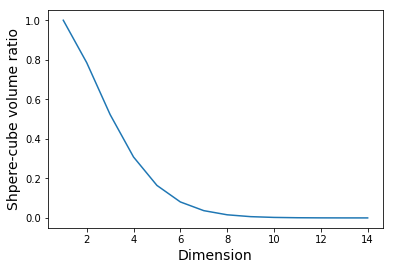

In [ ]:
max_d = 15
vol_ratio = [estimate_volume(d, 1, n_samples) / 2**d for d in range(1, max_d)]

#plt.yscale('log')
plt.xlabel("Dimension", fontsize=14)
plt.ylabel("Shpere-cube volume ratio", fontsize=14)
plt.plot(np.arange(1, max_d), vol_ratio)

plt.savefig('shpere-cube volume ratio.png', dpi=200)

This is an example of the non-trivial behaviours that hugh-dim geometry show: the volume of the hypersphere becomes infinitesimal with respect the hypercube one!